In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Explore Data

In [2]:
bdf <- read_csv("../input/bookcrossing-dataset/Books Data with Category Language and Summary/Preprocessed_data.csv", show_col_types=FALSE)


# Tidy Data
book_data <- slice(bdf , 0:100000) %>%
    rename_with(str_to_lower) %>%
    filter(!state %in% c("n/a"),
          !city %in% c("n/a"),
          !country %in% c("n/a")) %>%
    mutate(age = round(age))

book_data$category <- gsub("\\[|\\]", "", book_data$category)
book_data$category <- gsub("\'", "", book_data$category, fixed = TRUE)

dim(book_data)
head(book_data,2)

New names:
* `` -> ...1

Warning message:
“One or more parsing issues, see `problems()` for details”


[1] 98453    19

...1,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,summary,language,category,city,state,country
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0,2,"stockton, california, usa",18,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg,"Provides an introduction to classical myths placing the addressed topics within their historical context, discussion of archaeological evidence as support for mythical events, and how these themes have been portrayed in literature, art, ...",en,Social Science,stockton,california,usa
1,8,"timmins, ontario, canada",35,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,"In a small town in Canada, Clara Callan reluctantly takes leave of her sister, Nora, who is bound for New York.",en,Actresses,timmins,ontario,canada


In [3]:
summary(book_data)

      ...1          user_id         location              age       
 Min.   :    0   Min.   :     2   Length:98453       Min.   : 5.00  
 1st Qu.:24987   1st Qu.: 66487   Class :character   1st Qu.:30.00  
 Median :50001   Median :136010   Mode  :character   Median :35.00  
 Mean   :49995   Mean   :137320                      Mean   :35.81  
 3rd Qu.:74983   3rd Qu.:209373                      3rd Qu.:39.00  
 Max.   :99999   Max.   :278851                      Max.   :99.00  
     isbn               rating        book_title        book_author       
 Length:98453       Min.   : 0.000   Length:98453       Length:98453      
 Class :character   1st Qu.: 0.000   Class :character   Class :character  
 Mode  :character   Median : 0.000   Mode  :character   Mode  :character  
                    Mean   : 3.247                                        
                    3rd Qu.: 8.000                                        
                    Max.   :10.000                                 

In [4]:
# To use dark theme
devtools::install_github("nsgrantham/ggdark")

library(ggdark)

rlang  (0.4.11 -> 0.4.12) [CRAN]
pillar (1.6.3  -> 1.6.4 ) [CRAN]


Installing 2 packages: rlang, pillar

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘rlang’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘pillar’ had non-zero exit status”


✔  checking for file ‘/tmp/RtmpVTnPQj/remotesf87f7c31/nsgrantham-ggdark-b39b96c/DESCRIPTION’
─  preparing ‘ggdark’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘ggdark_0.2.1.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# 1. Quick and Dirty EDA

## Let's check missing values 

In [5]:
# source -> https://jenslaufer.com/data/analysis/visualize_missing_values_with_ggplot.html
missing_values <- book_data %>%
    gather( key = "key", value = "val") %>%
    mutate(isna = is.na(val)) %>%
    group_by(key) %>%
    mutate(total = n()) %>%
    group_by(key, total, isna) %>%
    summarise(num.isna = n()) %>%
    mutate(pct = num.isna / total * 100)
missing_values

`summarise()` has grouped output by 'key', 'total'. You can override using the `.groups` argument.



key,total,isna,num.isna,pct
<chr>,<int>,<lgl>,<int>,<dbl>
...1,98453,FALSE,98453,100.00000000
age,98453,FALSE,98453,100.00000000
book_author,98453,FALSE,98453,100.00000000
book_title,98453,FALSE,98453,100.00000000
category,98453,FALSE,98453,100.00000000
city,98453,FALSE,98425,99.97156003
city,98453,TRUE,28,0.02843997
country,98453,FALSE,95594,97.09607630
country,98453,TRUE,2859,2.90392370


Inverted geom defaults of fill and color/colour.
To change them back, use invert_geom_defaults().

Warning message:
“Removed 16 rows containing missing values (position_stack).”


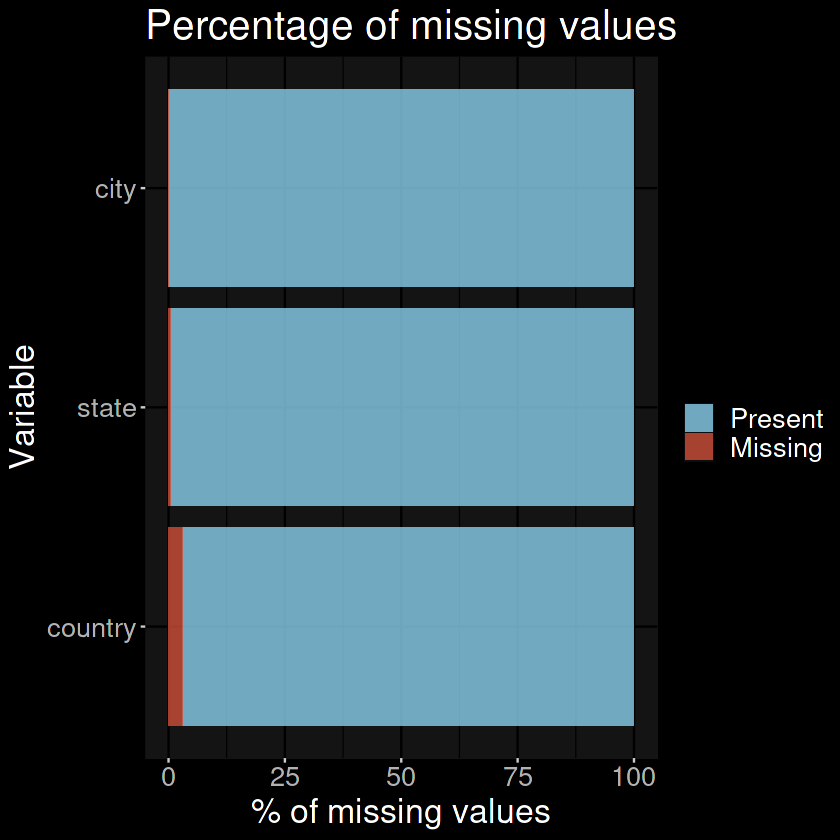

In [6]:
levels <-
    (missing_values  %>% filter(isna == T) %>% arrange(desc(pct)))$key

percentage_plot <- missing_values %>%
      ggplot() +
      geom_bar(aes(x = reorder(key, desc(pct)), 
                   y = pct, fill=isna), 
                   stat = 'identity', alpha=0.8) +
      scale_x_discrete(limits = levels) +
      scale_fill_manual(name = "", 
                        values = c('skyblue', 'tomato3'), labels = c("Present", "Missing")) +
      coord_flip() +
      dark_theme_gray() +
      theme(text = element_text(size=20)) +
      labs(title = "Percentage of missing values", x =
             'Variable', y = "% of missing values")

percentage_plot

In [7]:
# To change figure size
options(repr.plot.width=14, repr.plot.height=10)

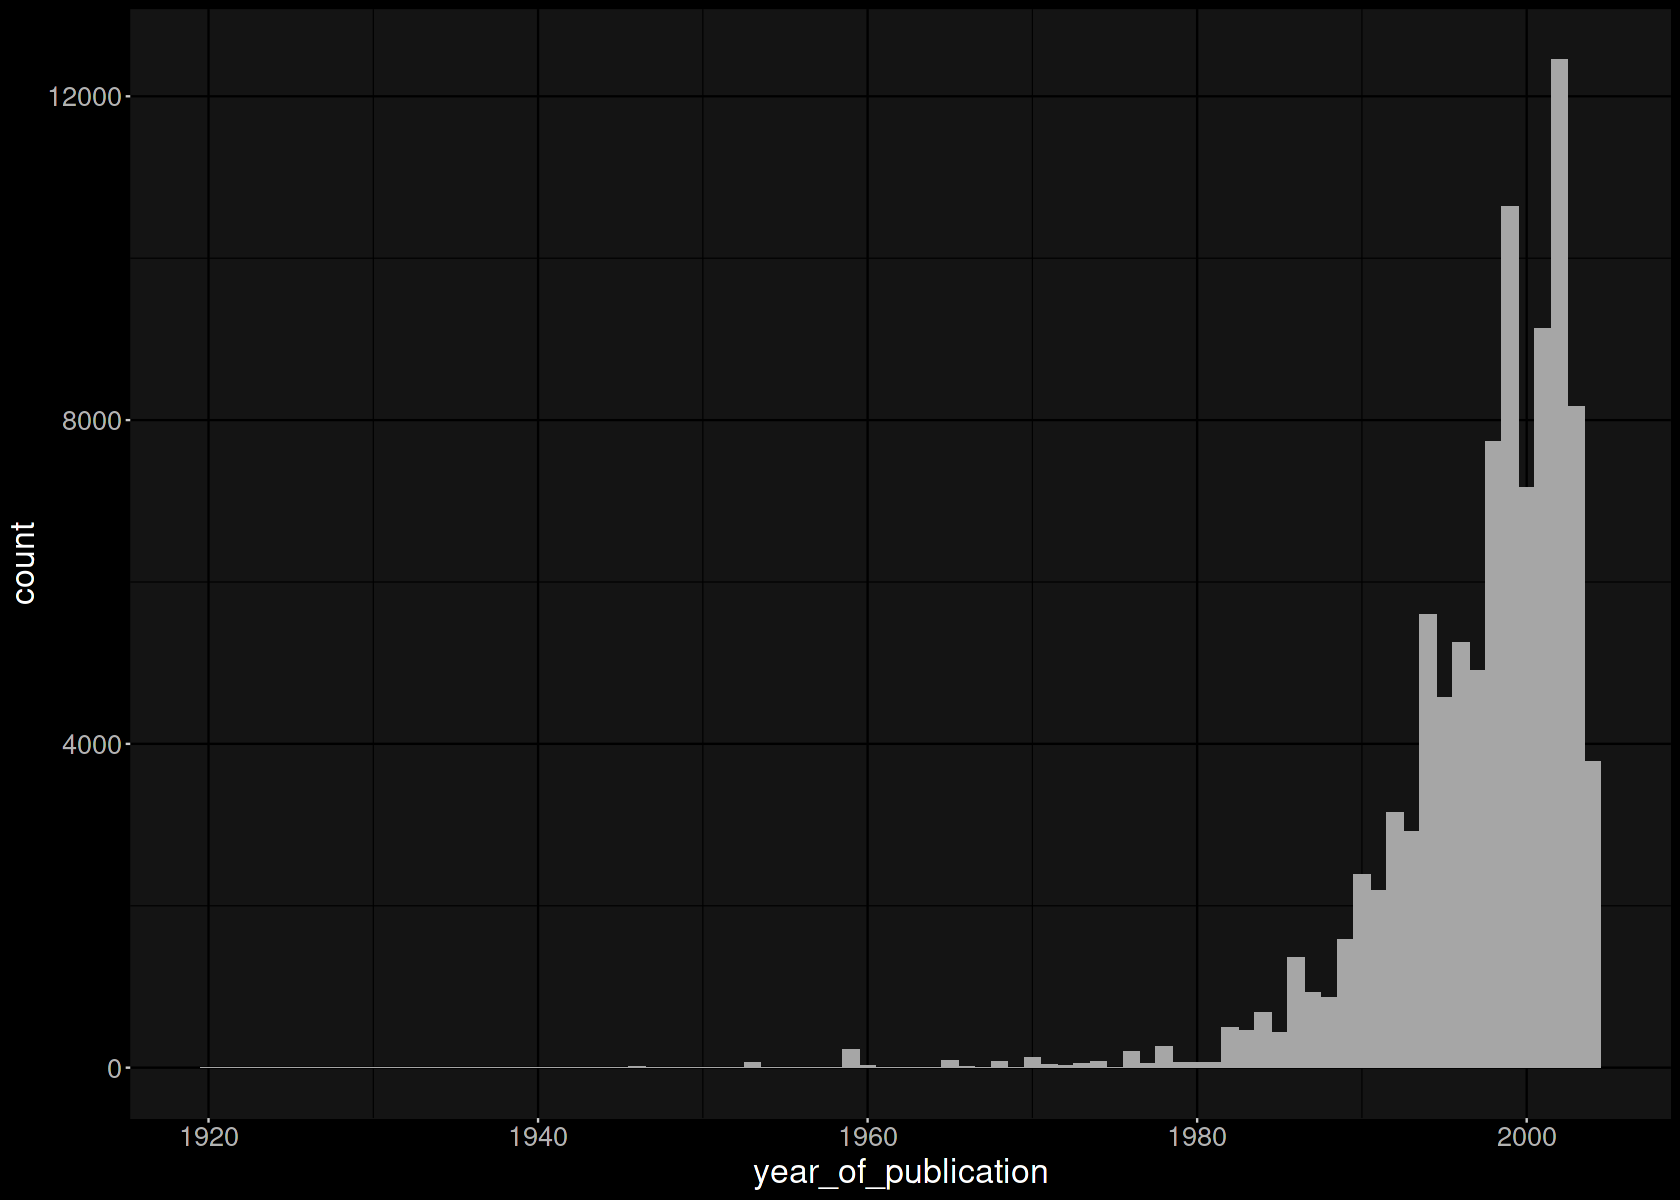

In [8]:
year_hist <- book_data %>%
    ggplot(aes(year_of_publication)) +
    geom_histogram(binwidth=1) +
    dark_theme_gray() +
    theme(text = element_text(size = 20))

year_hist

## Rating

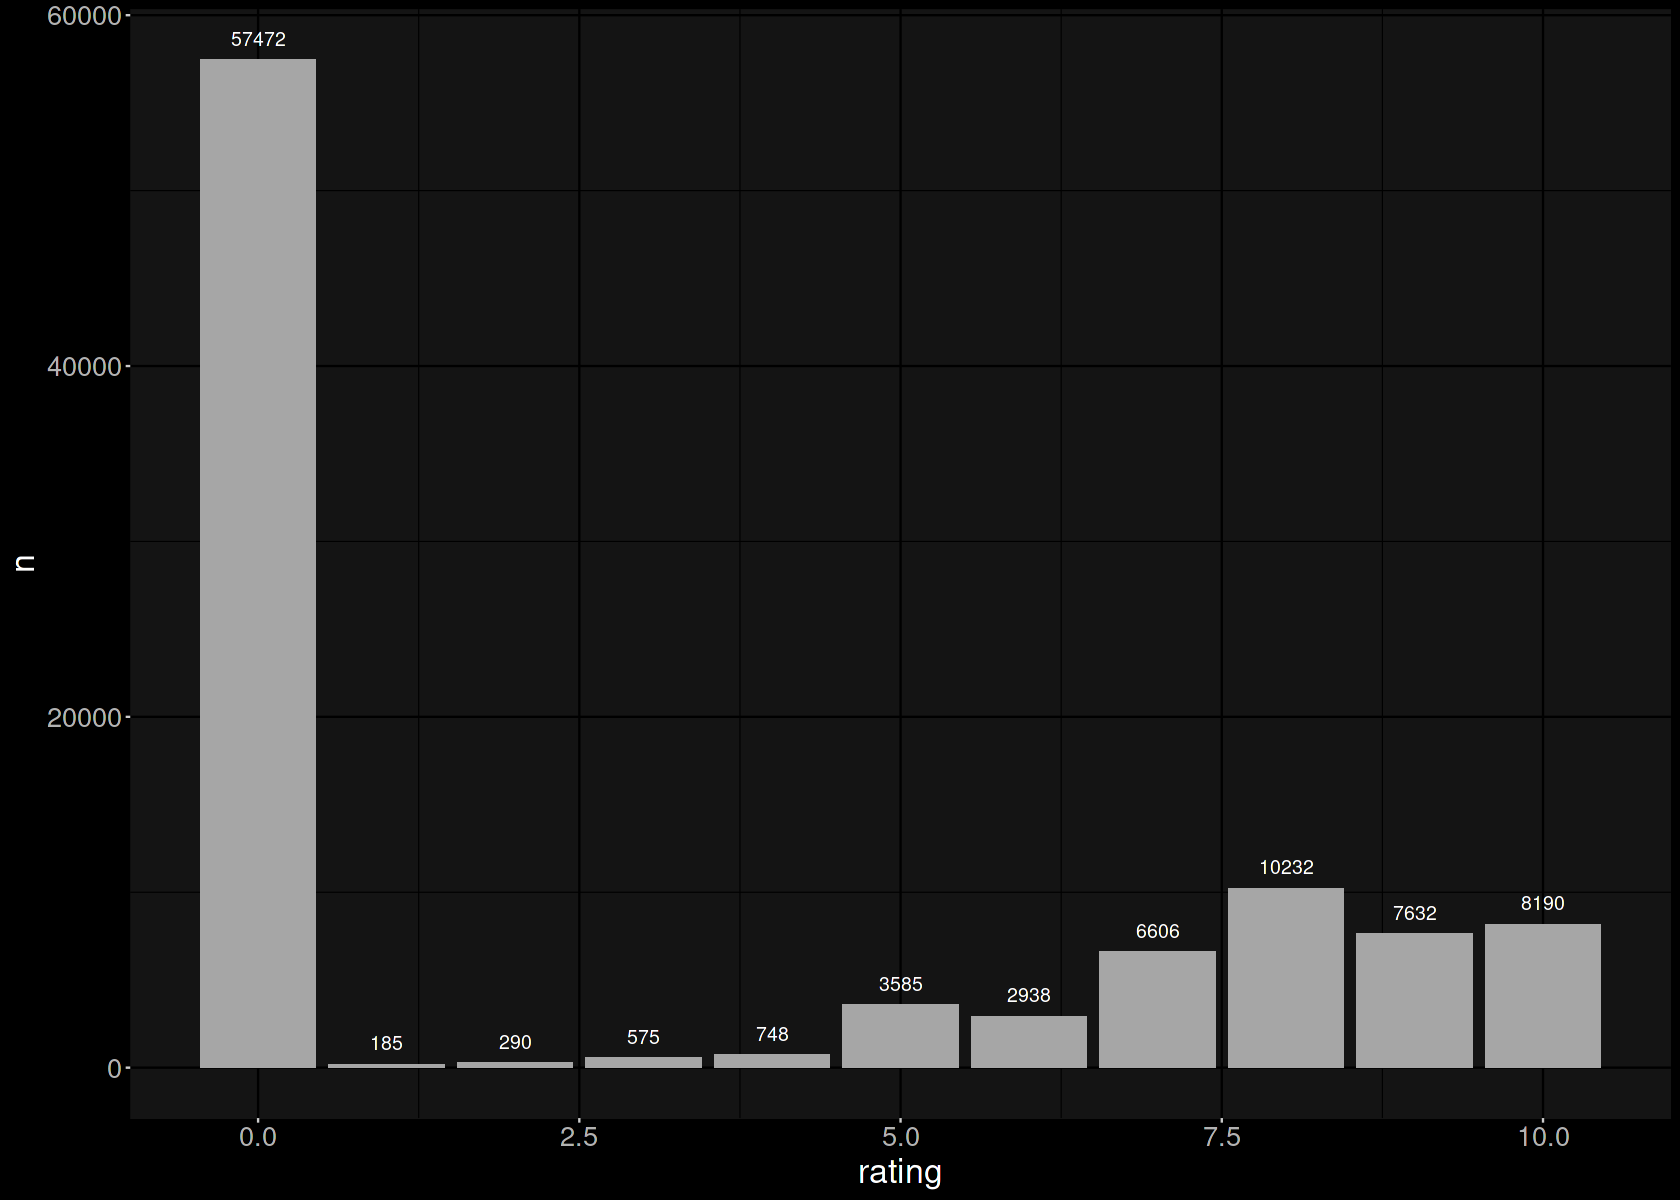

In [9]:
book_data %>%
    count(rating, sort = TRUE) %>%
    ggplot(aes(rating,n)) +
    geom_col() +
    geom_text(aes(label=n),vjust= -1,  hjust=.5, size=4) +
    dark_theme_gray() +
    theme(text = element_text(size=20))

## Top 20 Book Titles

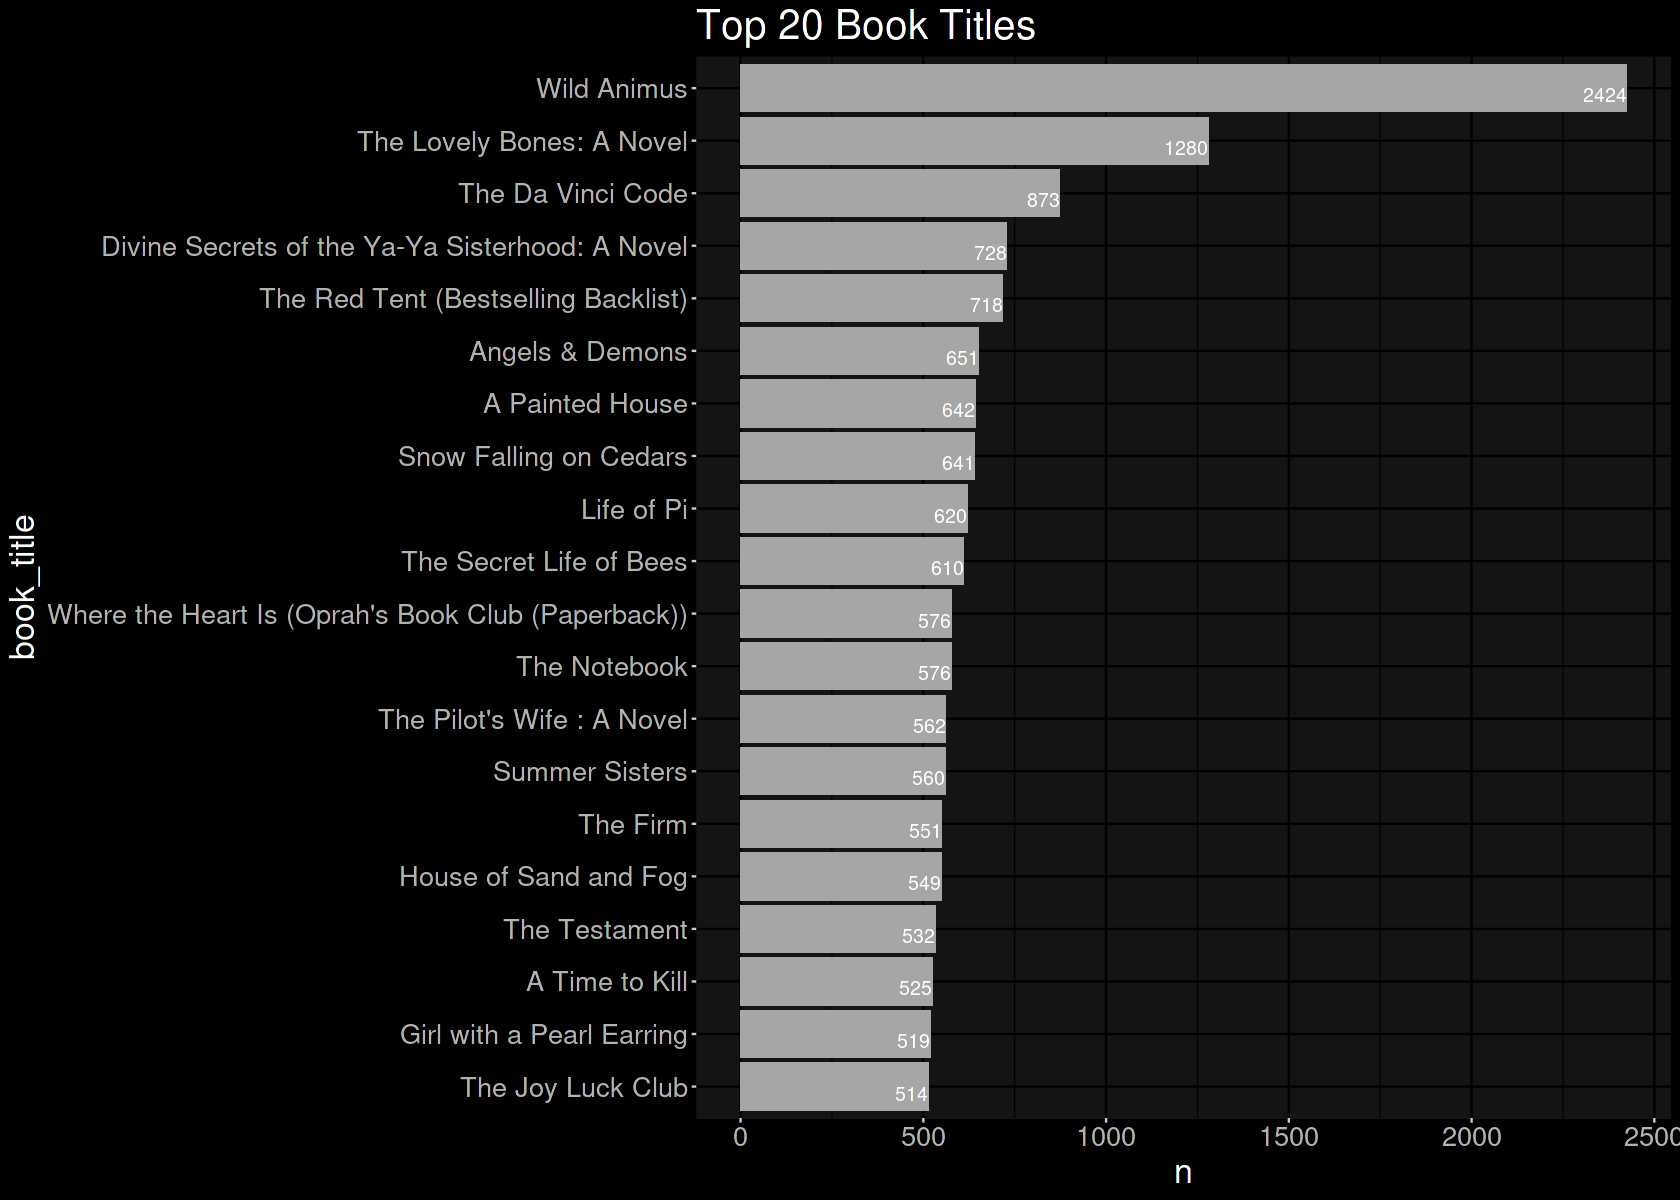

In [10]:
top_20_booktitles <- book_data %>%
    count(book_title, sort=TRUE) %>%
    mutate(book_title = reorder(book_title,n)) %>%
    head(20) 


top_20_booktitles %>%
    ggplot(aes(book_title,n)) +
    geom_col() +
    geom_text(aes(label=n), vjust=1, hjust=1, size=4) +
    dark_theme_gray() +
    theme(text= element_text(size=20)) +
    labs(title="Top 20 Book Titles") +
    coord_flip()
    
    

## Top 20 countries

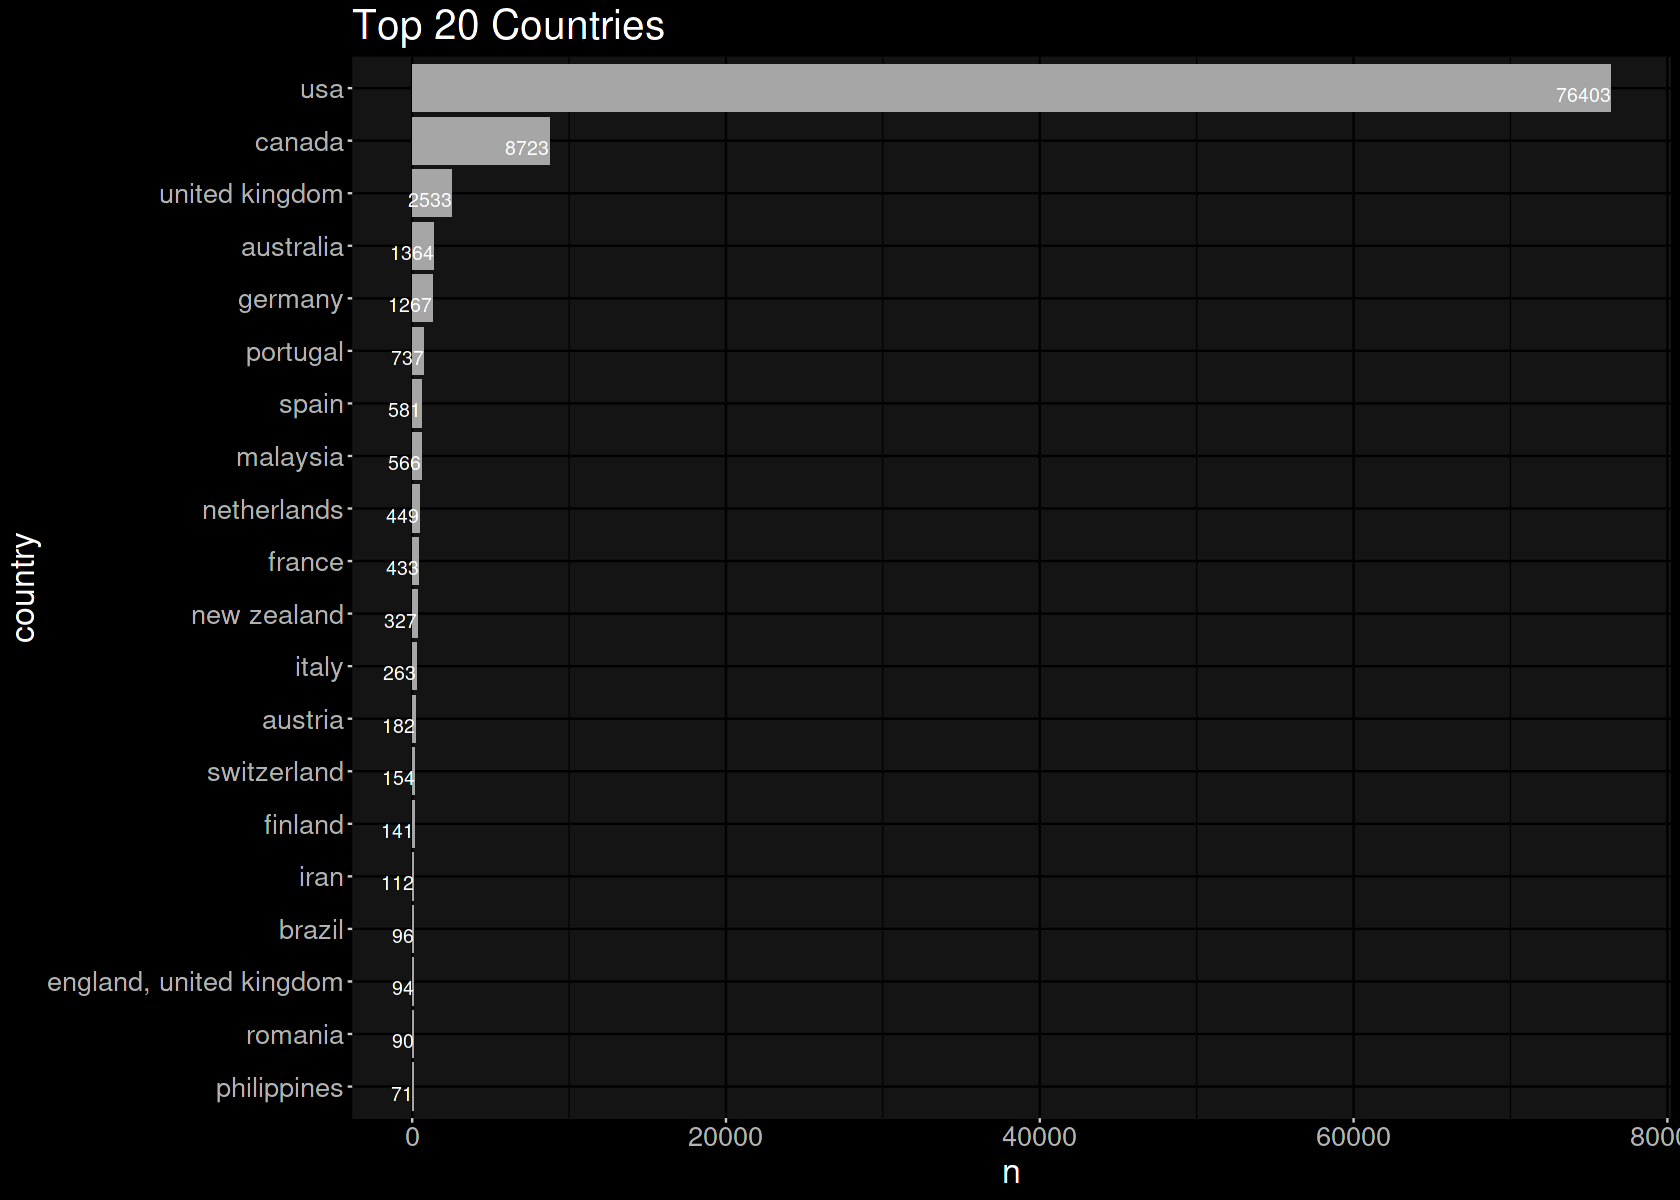

In [11]:
top_20_countries <- book_data %>%
                filter(!is.na(country)) %>%
                count(country, sort=TRUE) %>%
                mutate(country = reorder(country,n)) %>%
                head(20)

top_20_countries %>%
    ggplot(aes(country,n)) +
    geom_col() +
    geom_text(aes(label=n), vjust= 1, hjust= 1, size=4) +
    dark_theme_gray() +
    theme(text= element_text(size=20)) +
    labs(title = "Top 20 Countries") +
    coord_flip()
    

## Top 20 States

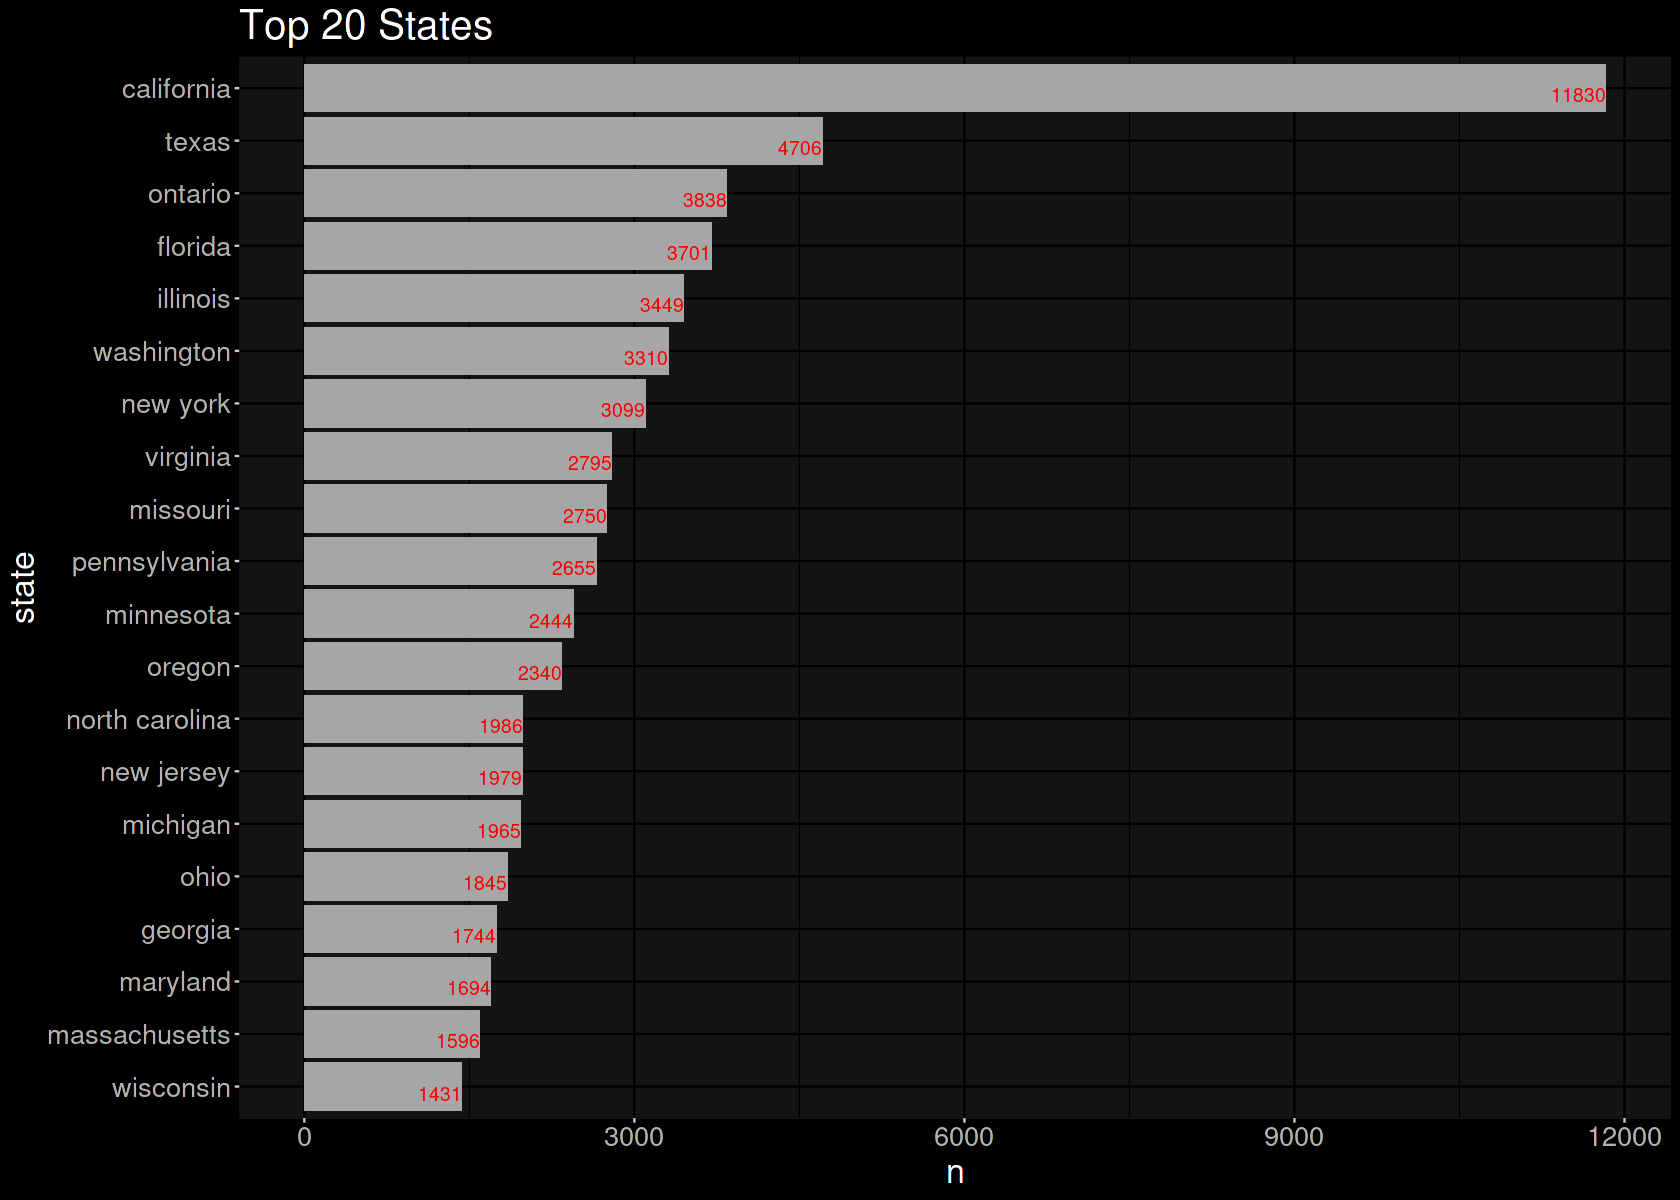

In [12]:
top_20_states <- book_data %>%
    count(state, sort = TRUE) %>%
    mutate(state = reorder(state, n)) %>%
    filter(str_detect(state, "[a-z]"),
          !state %in% c("n/a" , "england", "british columbia")) %>%
    head(20)

top_20_states %>%
    ggplot(aes(state, n)) +
    geom_col() +
    geom_text(aes(label=n), vjust = 1, hjust = 1, size = 4, color= "red") +
    dark_theme_gray() +
    coord_flip() + 
    labs(title = "Top 20 States") + 
    theme(text = element_text(size=20))
    

## Top 20 Cities



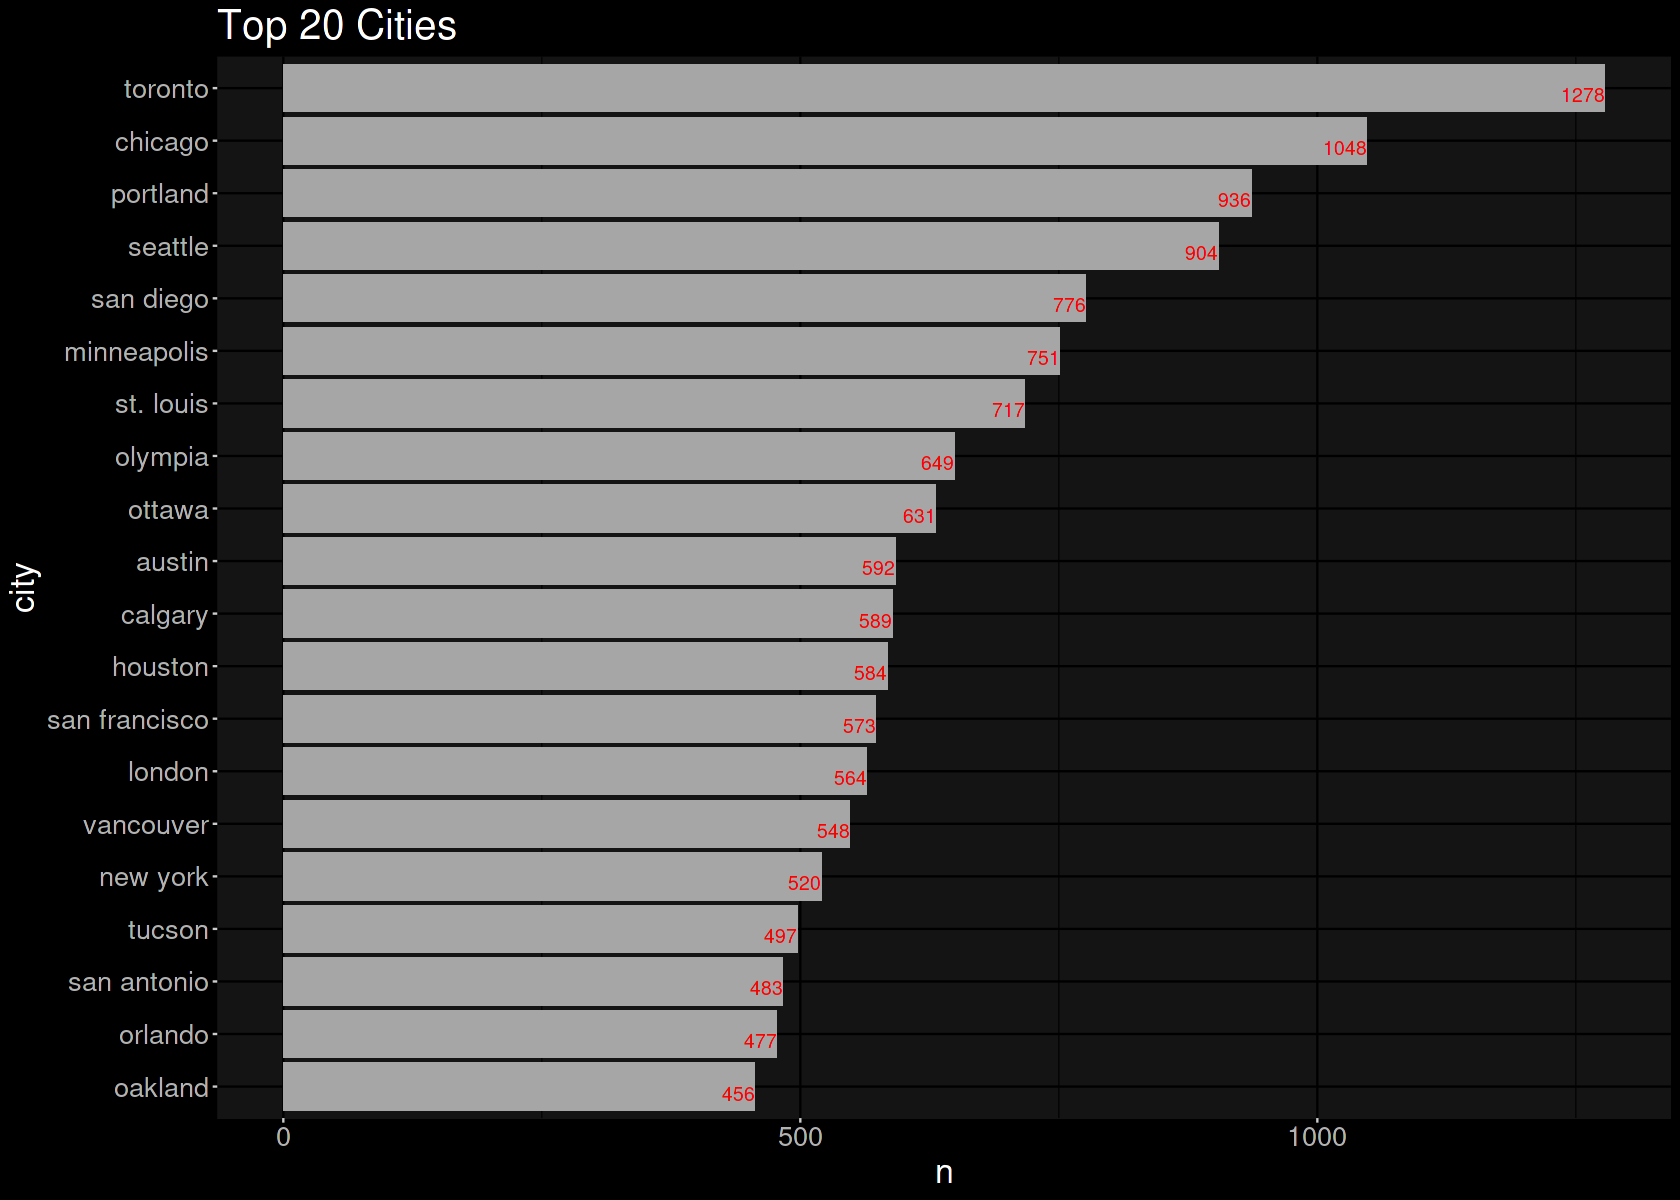

In [13]:
top_20_cities <- book_data %>%
    count(city, sort = TRUE) %>%
    mutate(city = reorder(city, n)) %>%
    head(20)

top_20_cities %>%
    ggplot(aes(city, n)) +
    geom_col() +
    coord_flip() +
    geom_text(aes(label=n), hjust = 1, vjust = 1, color = "red", size=4) +
    dark_theme_gray() +
    theme(text = element_text(size=20)) +
    labs(title = "Top 20 Cities")
    

## Top 16 Ages

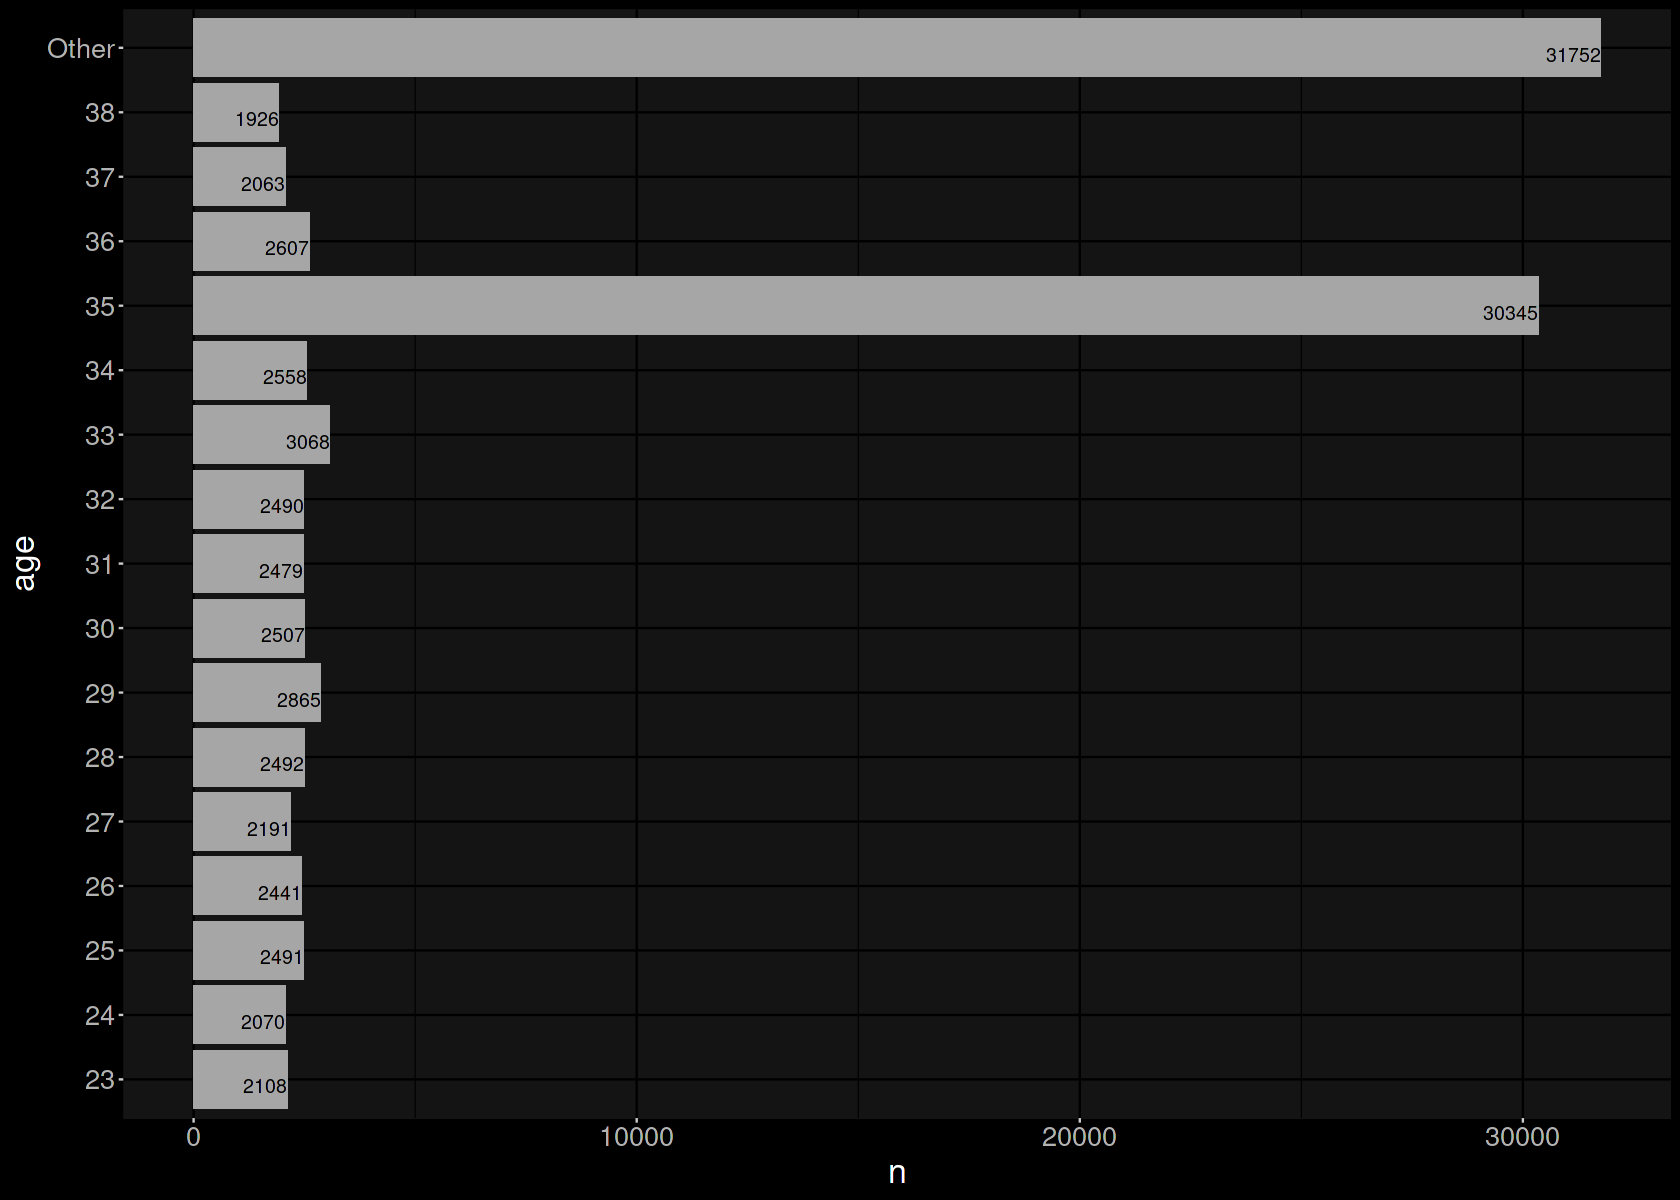

In [14]:
top_16_age <- book_data %>%
    mutate(age = fct_lump(as.character(age) , 16)) %>%
    count(age, sort = TRUE)

top_16_age %>%
    ggplot(aes(age, n)) +
    geom_col() +
    geom_text(aes(label=n), vjust=1, hjust=1,color="black", size=4) +
    dark_theme_gray() +
    theme(text = element_text(size=20)) +
    coord_flip()
     
    

## Top 16 Authors

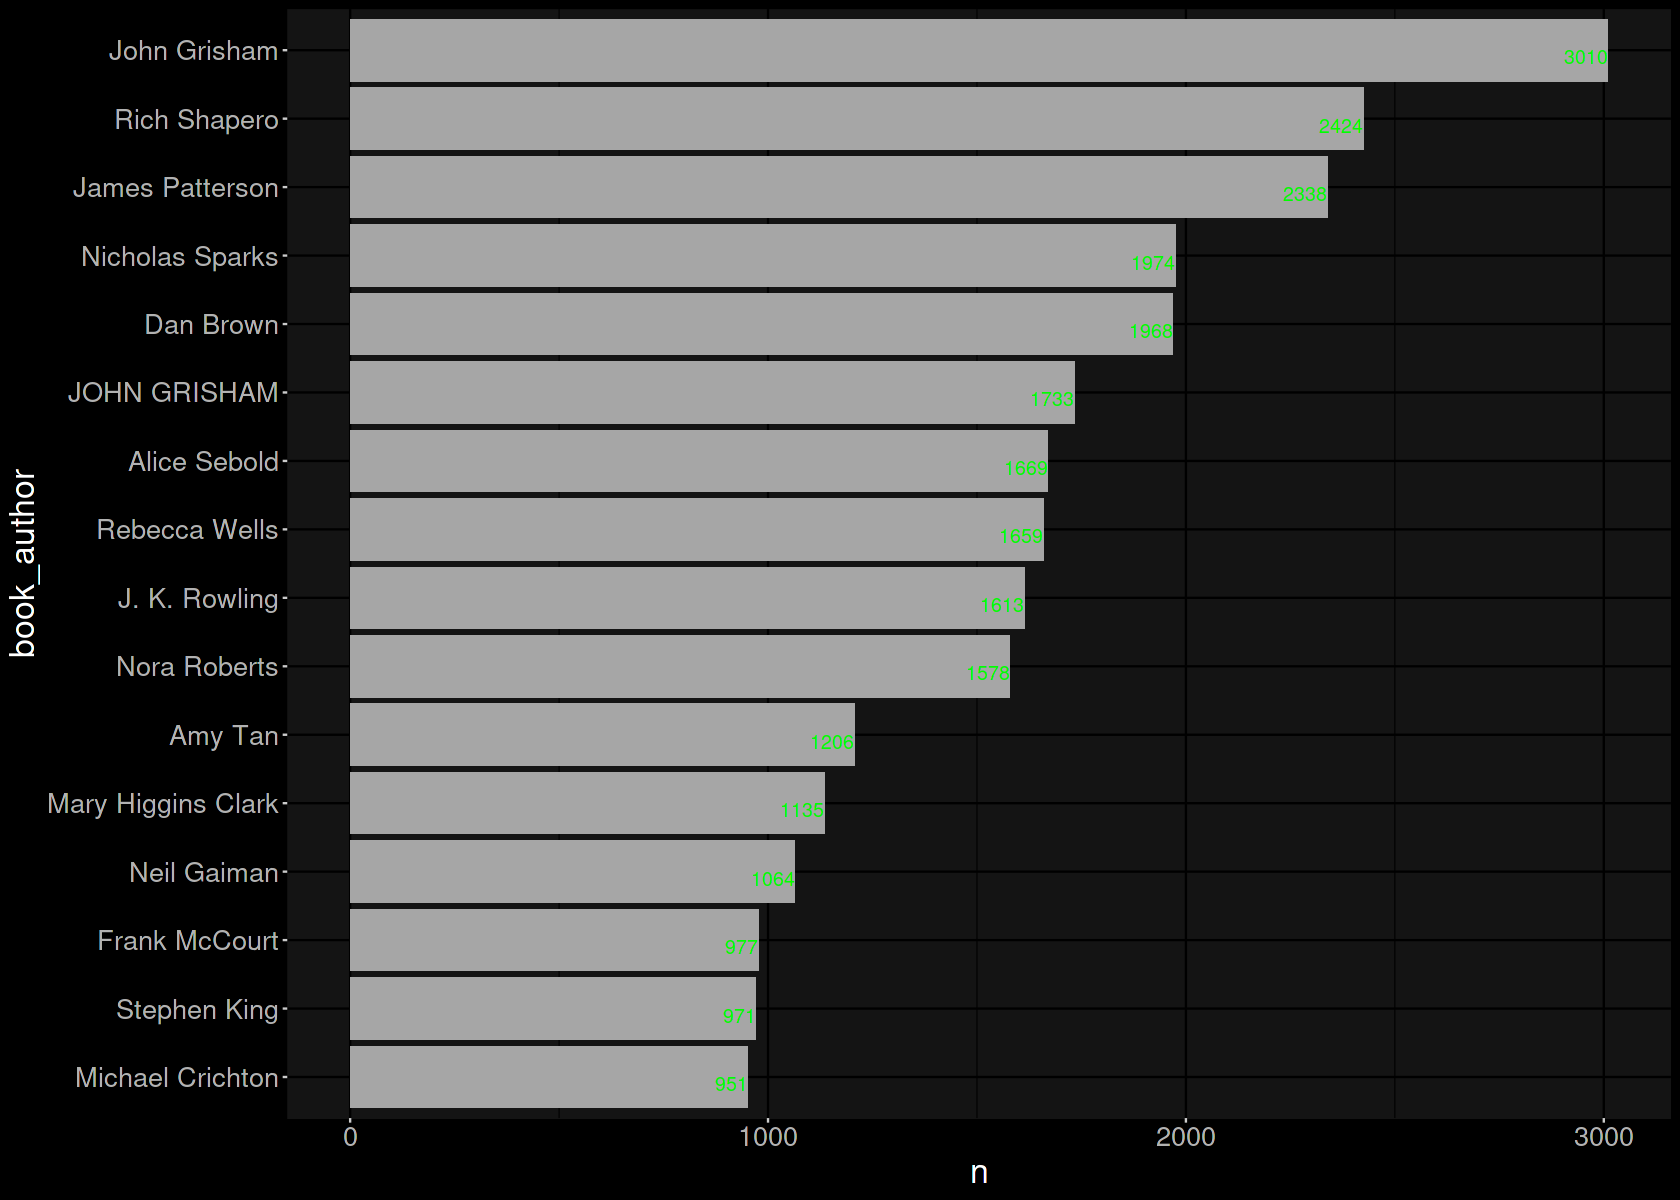

In [15]:
top_16_authors <- book_data %>%
    count(book_author,  sort = TRUE) %>%
    mutate(book_author = fct_reorder(book_author, n)) %>%
    head(16)


top_16_authors %>%
    ggplot(aes(book_author,n)) +
    geom_col() +
    geom_text(aes(label=n), hjust=1, vjust=1,color= "green", size=4) +
    dark_theme_gray() +
    theme(text = element_text(size = 20)) +
    coord_flip() 

## Top 20 Publishers

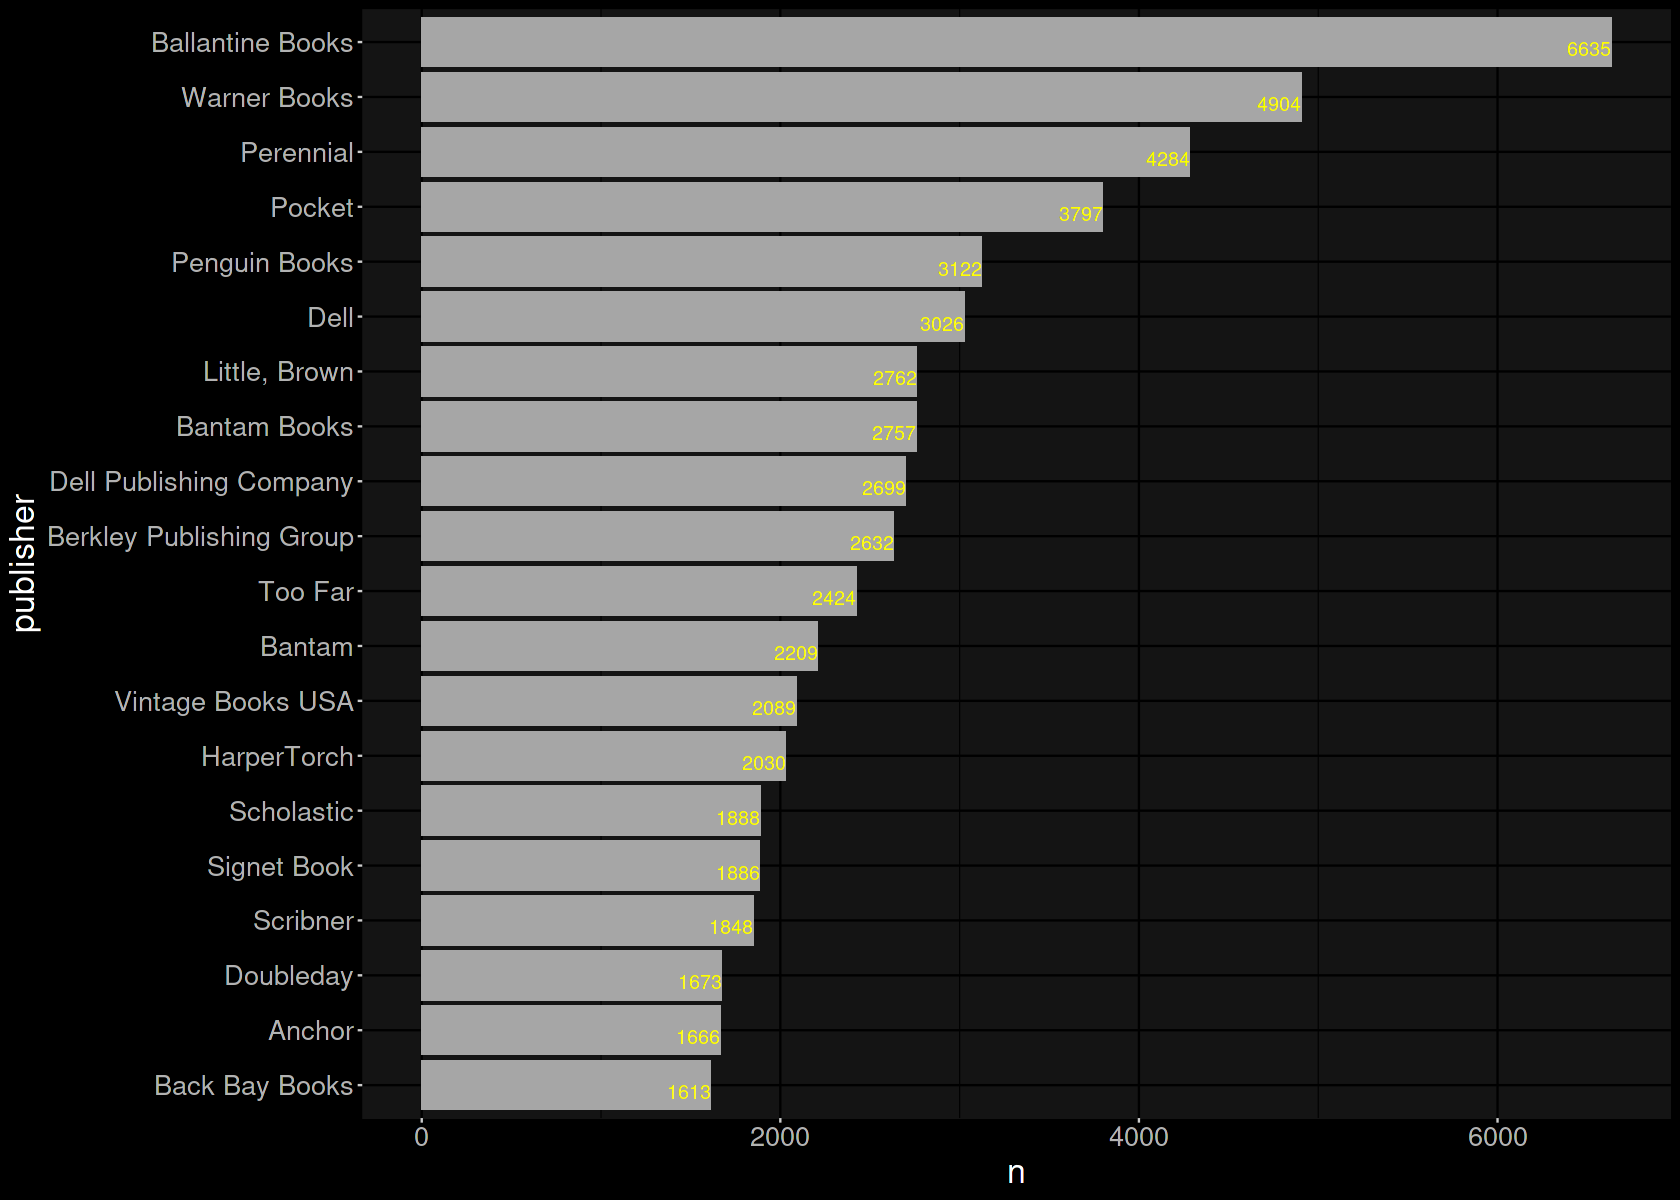

In [16]:
top_20_publishers <- book_data %>%
    count(publisher, sort = TRUE) %>%
    mutate(publisher = fct_reorder(publisher, n)) %>%
    head(20)

top_20_publishers %>%
    ggplot(aes(publisher, n)) +
    geom_col() +
    geom_text(aes(label = n), vjust=1, hjust = 1, color="yellow", size=4) +
    dark_theme_gray() +
    theme(text = element_text(size = 20)) +
    coord_flip()


## Top 20 Categories

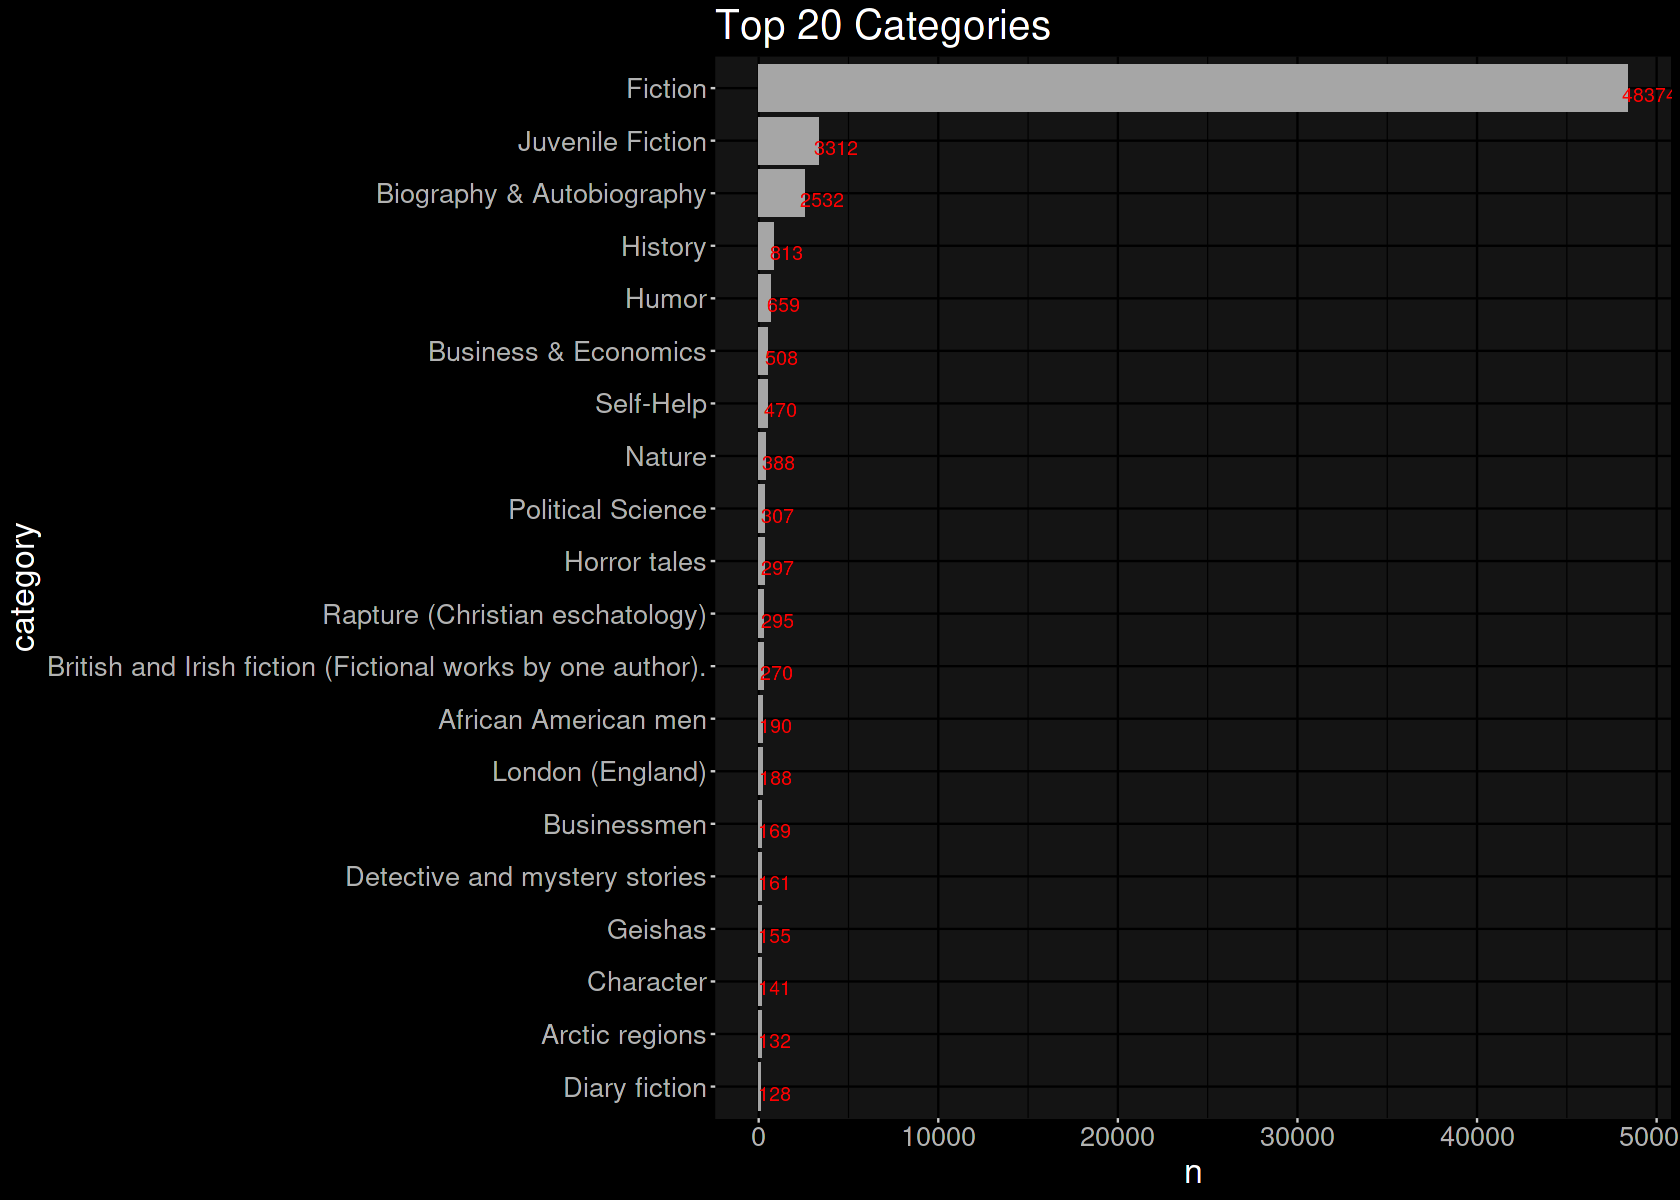

In [17]:
top_20_categories <- book_data %>%
    filter(str_detect(category , "[a-z]")) %>%
    count(category, sort = TRUE) %>%
     mutate(category = fct_reorder(category,n)) %>%
    head(20)

top_20_categories %>%
    ggplot(aes(category, n )) +
    geom_col() +
    geom_text(aes(label = n), hjust = .1, vjust = 1, color="red", size = 4) +
    dark_theme_gray() +
    theme(text = element_text(size = 20)) +
    labs(title= "Top 20 Categories") +
    coord_flip()

## Average Rating over year


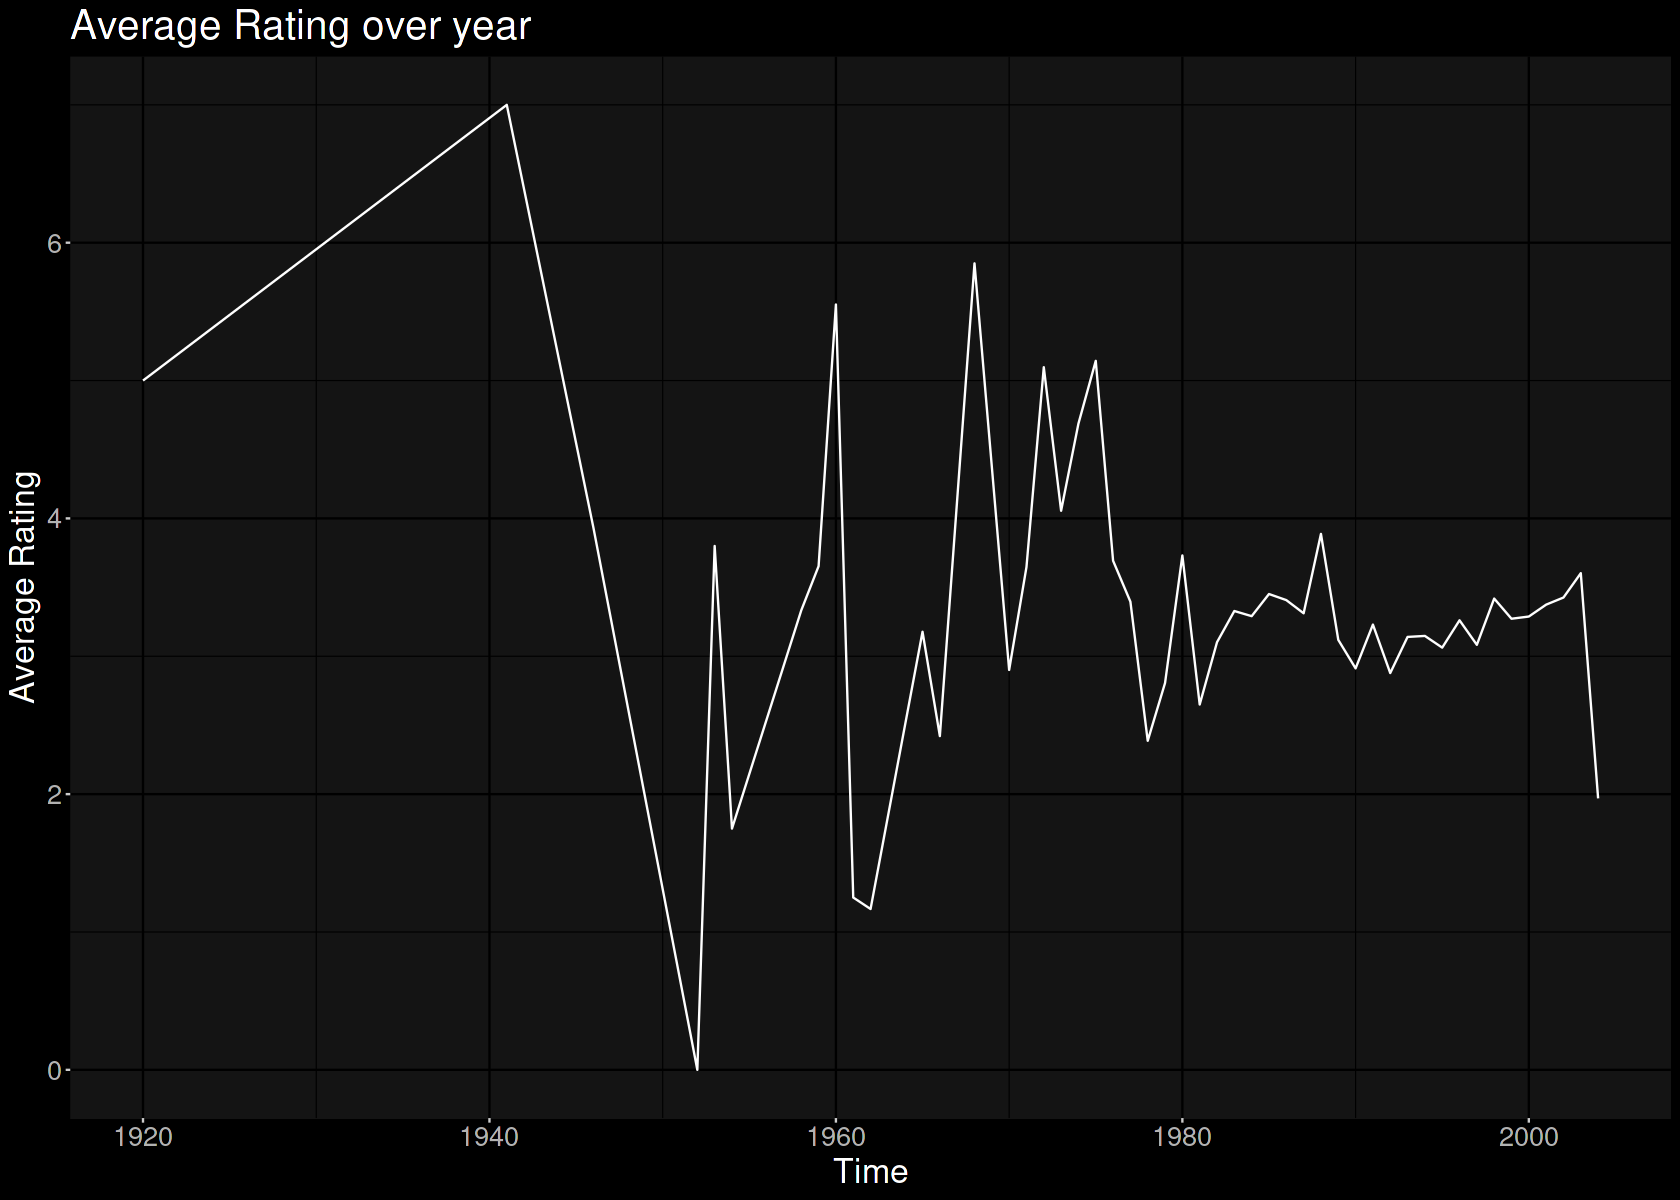

In [18]:
by_year <- book_data %>%
    group_by(year_of_publication) %>%
    summarize(avg_rating = mean(rating),
              pct_zero = mean(rating == 0),
              pct_ten = mean(rating == 10))

by_year %>%
    ggplot(aes(year_of_publication, avg_rating)) +
    geom_line() +
    expand_limits(y = 0) +
    labs(x = "Time",
        y= "Average Rating") +
    dark_theme_gray() +
    theme(text = element_text(size = 20)) +
    labs(title = "Average Rating over year")
    


In [19]:
book_data %>%
    count(year_of_publication, sort = TRUE)

year_of_publication,n
<dbl>,<int>
2002,12454
1999,10643
2001,9137
2003,8164
1998,7736
2000,7172
1994,5599
1996,5257
1997,4901


# 2. Text Analysis

In [20]:
book_data %>%
    filter(rating > 3) %>%
    sample_n(3) %>%
    pull(summary)

[1] "In a stark, troubling, yet ultimately triumphant celebration of self-\ndetermination, award-winning author A. Manette Ansay re-creates a\nstifling world of guilty and pain, and the tormented souls who inhabit\nit."
[2] "9"                                                                                                                                                                                                                    
[3] "9"

In [21]:
names(book_data)

[1] "...1"                "user_id"             "location"           
 [4] "age"                 "isbn"                "rating"             
 [7] "book_title"          "book_author"         "year_of_publication"
[10] "publisher"           "img_s"               "img_m"              
[13] "img_l"               "summary"             "language"           
[16] "category"            "city"                "state"              
[19] "country"

In [22]:
library(tidytext)

word_per_summary <- book_data %>%
    filter(summary != "9",
          category != "9",
          language != "9") %>%
    unnest_tokens(word, summary) %>%
    anti_join(stop_words, by = "word") %>%
    filter(str_detect(word, "[a-z]")) %>%
    count(book_author, year_of_publication, rating, word)

word_per_summary

book_author,year_of_publication,rating,word,n
<chr>,<dbl>,<dbl>,<chr>,<int>
A. C. Crispin,1998,0,adopted,5
A. C. Crispin,1998,0,begins,5
A. C. Crispin,1998,0,carve,5
A. C. Crispin,1998,0,escaped,5
A. C. Crispin,1998,0,han,5
A. C. Crispin,1998,0,home,5
A. C. Crispin,1998,0,late,5
A. C. Crispin,1998,0,life,5
A. C. Crispin,1998,0,original,5


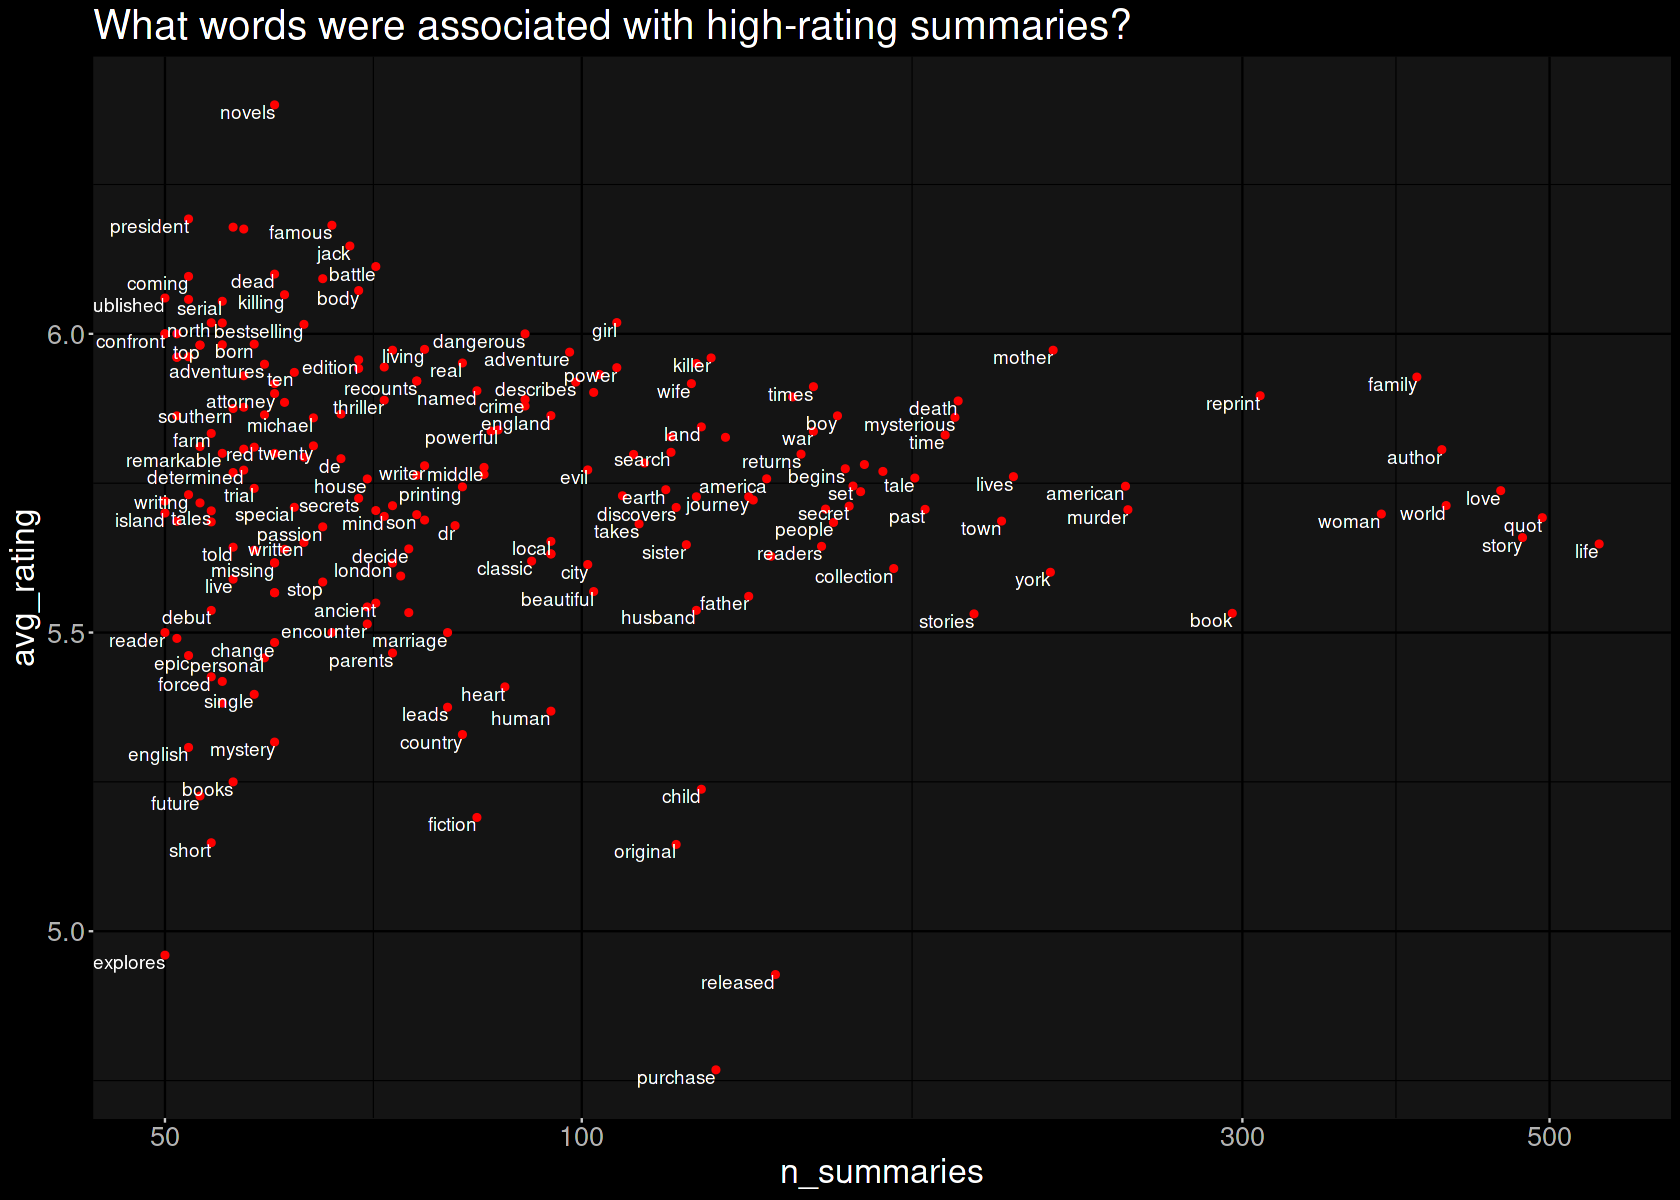

In [23]:
by_word <- word_per_summary %>%
    group_by(word) %>%
    summarize(avg_rating = mean(rating),
             n_summaries = n()) %>%
    arrange(desc(n_summaries)) %>%
    filter(n_summaries >= 50) %>%
    arrange(desc(avg_rating))

by_word %>%
    ggplot(aes(n_summaries, avg_rating)) +
    geom_point(color= 'red') +
    geom_text(aes(label = word), vjust = 1, hjust = 1, check_overlap = TRUE) +
    scale_x_log10() +
    dark_theme_gray() +
    theme(text = element_text(size = 20)) +
    labs(title = "What words were associated with high-rating summaries?")

In [24]:
book_data %>%
    filter(str_detect(summary, "family")) %>%
    sample_n(3) %>%
    pull(book_title)

[1] "SHIPPING NEWS"                                  
[2] "The Thorn Birds"                                
[3] "Hunting Season (Anna Pigeon Novels (Paperback))"

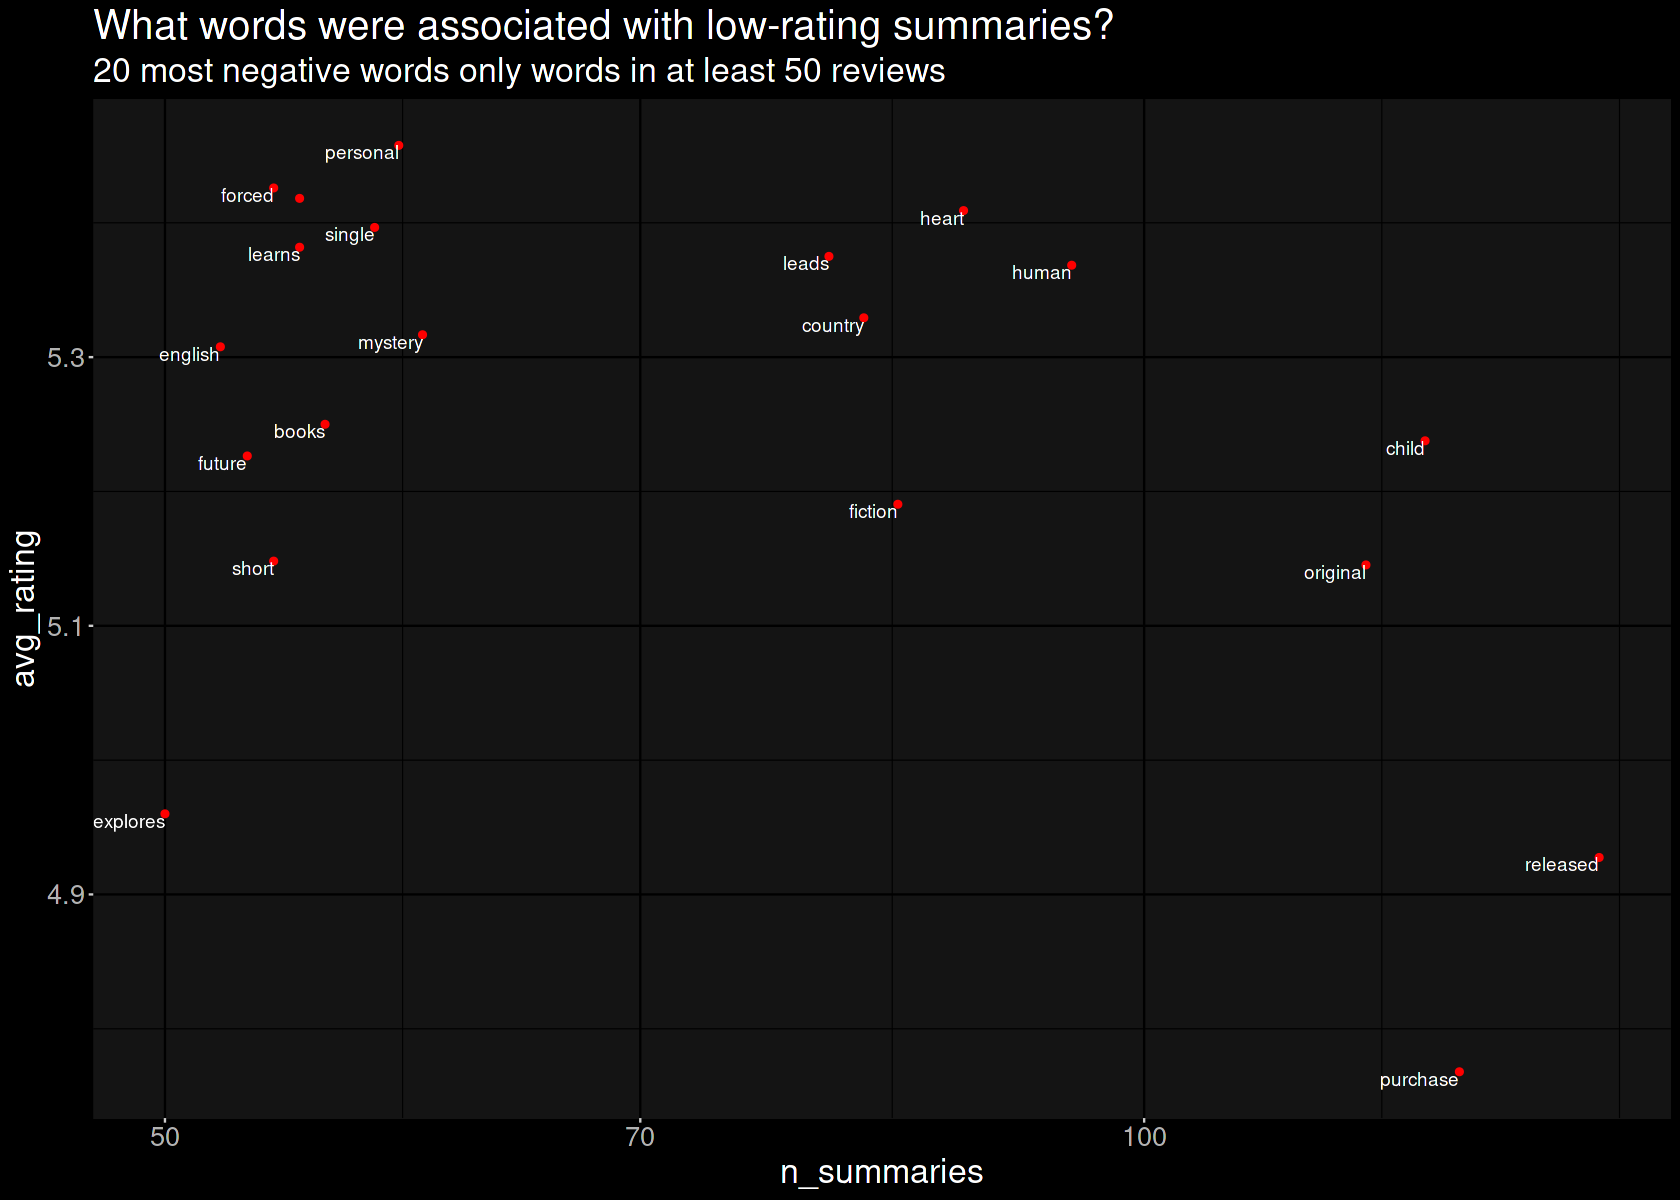

In [25]:
by_word %>%
    top_n(20, -avg_rating) %>%
    ggplot(aes(n_summaries, avg_rating)) +
    geom_point(color = "red") +
    geom_text(aes(label=word), vjust=1, hjust = 1, check_overlap = TRUE) + 
    scale_x_log10() +
    dark_theme_gray() +
    theme(text = element_text(size = 20)) +
    labs(title = "What words were associated with low-rating summaries?",
        subtitle = "20 most negative words only words in at least 50 reviews")

In [26]:
book_data %>%
    filter(str_detect(summary, "explores")) %>%
    sample_n(3) %>%
    pull(book_title)

[1] "Patty Jane's House of Curl (Ballantine Reader's Circle)"
[2] "The Tao of Pooh"                                        
[3] "The Tao of Pooh"

# References 

[ggdark](https://cran.r-project.org/web/packages/ggdark/readme/README.html)

[Missing value visualization with tidyverse in R](https://jenslaufer.com/data/analysis/visualize_missing_values_with_ggplot.html)

[wine rating](https://github.com/dgrtwo/data-screencasts/blob/master/wine-ratings.Rmd)

[text mining with R](https://www.tidytextmining.com/)

[horror movie ratings](https://github.com/dgrtwo/data-screencasts/blob/master/horror-movie-ratings.Rmd)

[animal crossing](https://github.com/dgrtwo/data-screencasts/blob/master/animal-crossing.Rmd)

[ramen rating](https://github.com/dgrtwo/data-screencasts/blob/master/ramen-ratings.Rmd)


[Board Game](https://github.com/dgrtwo/data-screencasts/blob/master/board-games.Rmd)

[Sentiment analysis with tidymodels and #TidyTuesday Animal Crossing reviews](https://juliasilge.com/blog/animal-crossing/)

